## Seaborn 라이브러리 - 고급 그래프 도구
- Seaborn은 matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구
- 아나콘다 설치시 자동으로 설치

In [ ]:
# 한글폰트 설치
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
# 런타임 재시작

In [ ]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/nanum/NanumBrush.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

#### Dataset load
- 타이타닉 데이터셋은 1912년 타이타닉호 침몰 사고 생존자 예측을 위한 대표적인 머신러닝 데이터셋
- 주요 데이터 항목:
    ```
    - PassengerId: 승객 ID.
    - Survived: 생존 여부 (0 = 사망, 1 = 생존).
    - Pclass: 승객 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석).
    - Name: 승객 이름.
    - Sex: 성별 (male, female).
    - Age: 나이.
    - SibSp: 함께 탑승한 형제자매/배우자 수.
    - Parch: 함께 탑승한 부모/자녀 수.
    - Ticket: 티켓 번호.
    - Fare: 운임.
    - Cabin: 객실 번호.
    - Embarked: 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton).
    ```


In [ ]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 회귀선이 있는 산점도
- 회귀선: 회귀선은 데이터 포인트들의 경향을 가장 잘 나타내는 "가상의 선", 여러 개의 점들이 있을 때, 그 점들을 통과하거나 그 점들에 가장 가까이 지나가는 직선
    - 회귀선을 통해 할 수 있는 것:
        ```
        - 예측 (Prediction): 새로운 데이터가 들어왔을 때, 회귀선을 이용해서 그 값을 예측할 수 있다.
        - 관계 파악 (Relationship Understanding): 변수들 간에 어떤 관계가 있는지 파악할 수 있다.
        - 패턴 분석 (Pattern Analysis): 데이터에 숨겨진 패턴이나 트렌드를 시각적으로 확인할 수 있다.
        ```
- regplot()함수는 서로 다른 2개의 연속 변수사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄.
- fit_reg=False 옵션을 설정하면 회귀선을 안 보이게 할 수 있음.

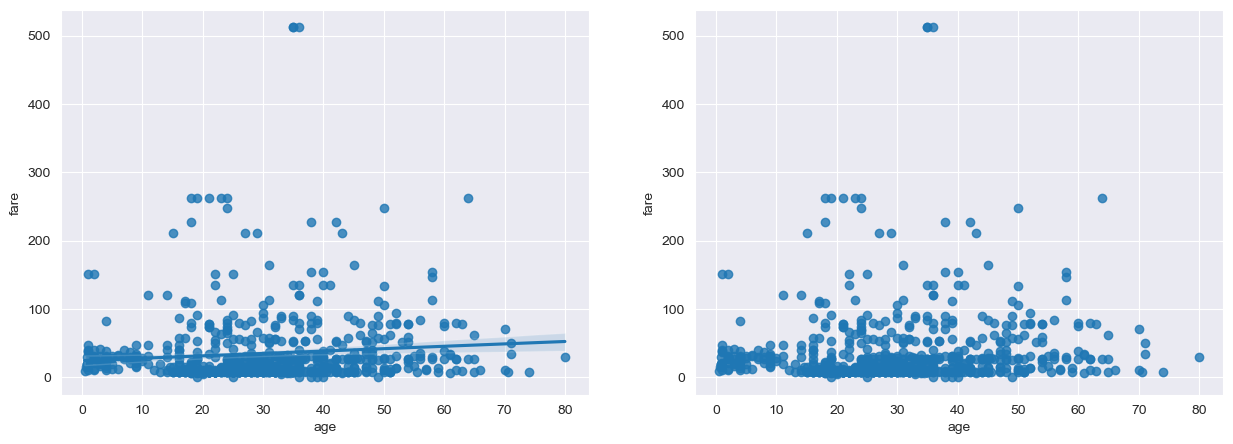

In [ ]:
# 회귀선이 있는 산점도
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1,         #axe 객체 - 1번째 그래프
            fit_reg=True)
# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프
            fit_reg=False)  #회귀선 미표시

plt.show()

#### 히스토그램/커널 밀도 그래프
- 히스토그램: 히스토그램은 데이터의 분포를 막대 그래프 형태로 보여주는 도구, 어떤 데이터가 어떤 값에 얼마나 많이 나타나는지 한눈에 볼 수 있는 그래프
- 커널 밀도: **커널 밀도 추정 (Kernel Density Estimation, KDE)**, 히스토그램과 비슷하게 데이터의 분포를 보여주지만, 훨씬 더 부드럽고 연속적인 곡선으로 보여주는 방법. 커널 밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수.
- 히스토그램은 histplot() 함수를 사용
- 커널 밀도 그래프는 kdeplot() 할수를 사용
- 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력.
- hist=False 옵션을 추가하면 히스토그램이 표시되지 않고, kde=False 옵션을 전달하면 커널 밀도 그래프를 표시하지 않음.



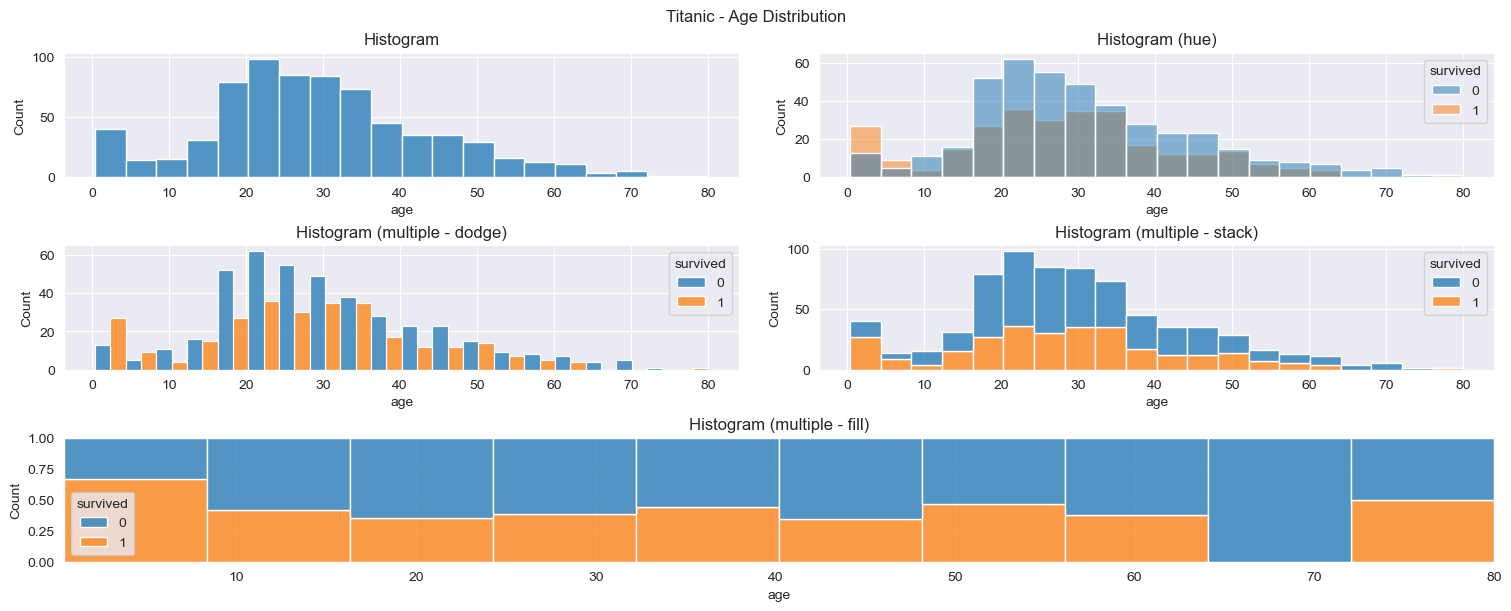

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
# figure 객체 1개, Axes 객체 5개 (Top 2개, Middle 2개, Bottom 1개)
fig, axes = plt.subplot_mosaic([['top_left', 'top_right'],
                                ['middle_left', 'middle_right'],
                                ['bottom', 'bottom']],
                                figsize=(15, 6),
                                constrained_layout=True)


# histplot
sns.histplot(x='age', data=titanic,  ax=axes['top_left'])

# histplot - hue 옵션 추가
sns.histplot(x='age', hue='survived', data=titanic,  ax=axes['top_right'])

# histplot - multiple(dodge) 적용
# multiple='dodge' 옵션은 두 그룹('survived,)의 막대를 나란히 배치하여 서로 겹치지 않게 표시
sns.histplot(x='age', hue='survived', multiple='dodge', data=titanic,  ax=axes['middle_left'])

# histplot - multiple(stack) 적용
# multiple='stack' 옵션은 하나의 막대 위에 다른 막대를 쌓아서 표시
sns.histplot(x='age', hue='survived', multiple='stack', data=titanic,  ax=axes['middle_right'])

# histplot - multiple(fill) 적용
# multiple=' fill' 옵션은 막대를 위아래로 쌓아서 표시
# bins=10은 나이 데이터를 10개의 구간으로 나누어 표시
sns.histplot(x='age', hue='survived', multiple='fill', bins=10, data=titanic,  ax=axes['bottom'])

# Figure 객체 제목 표시
fig.suptitle('Titanic - Age Distribution')

# Axes 객체 제목 표시
axes['top_left'].set_title('Histogram')
axes['top_right'].set_title('Histogram (hue)')
axes['middle_left'].set_title('Histogram (multiple - dodge)')
axes['middle_right'].set_title('Histogram (multiple - stack)')
axes['bottom'].set_title('Histogram (multiple - fill)')

plt.show()

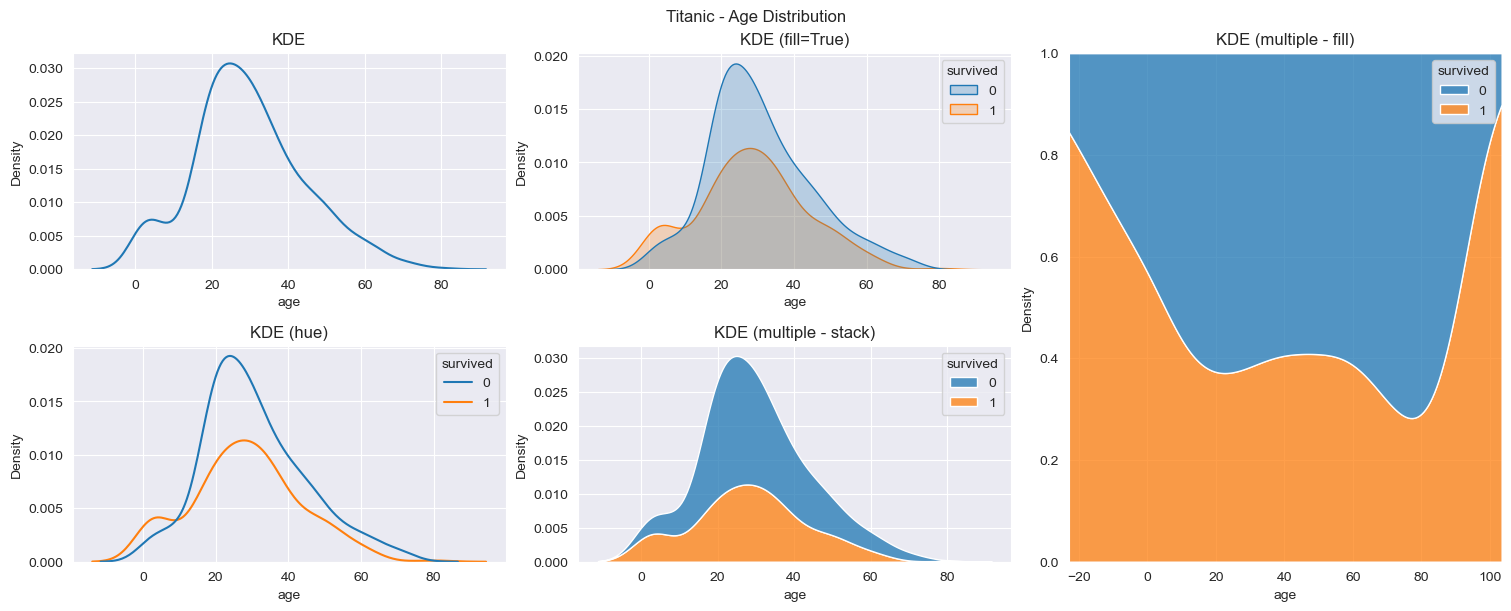

In [ ]:
# figure 객체 1개, Axes 객체 5개 (Left 2개, Center 2개, Right 1개)
fig, axes = plt.subplot_mosaic([['top_left', 'top_center', 'right'],
                                ['bottom_left', 'bottom_center', 'right']],
                                figsize=(15, 6),
                                constrained_layout=True)


# kdeplot
sns.kdeplot(x='age', data=titanic,  ax=axes['top_left'])

# kdeplot - hue 옵션 추가
sns.kdeplot(x='age', hue='survived', data=titanic,  ax=axes['bottom_left'])

# kdeplot - fill=True 적용
#  fill=True 매개변수를 추가하여 KDE 곡선 아래 영역을 채워서 표현
sns.kdeplot(x='age', hue='survived', fill=True, data=titanic,  ax=axes['top_center'])

# kdeplot - multiple(stack) 적용
# multiple='stack'은 'survived' 카테고리별 KDE 플룻을 서로 겹치지 않게 위아래로 쌓기
sns.kdeplot(x='age', hue='survived', multiple='stack', data=titanic,  ax=axes['bottom_center'])

# kdeplot - multiple(fill) 적용
# multiple#' fill'은 각 나이 대역에서 ' survived' 카테고리의 상대적인 구성비율을 총합이 1이 되도록 표현
# bw_adjust는 KDE 곡선의 부드러움을 제어하는 대역폭을 결정, 값이 클수록 곡선은 더 부드럽게 표현(histplot의 bins 옵션과 비슷)
sns.kdeplot(x='age', hue='survived', multiple='fill', bw_adjust=2.0, data=titanic,  ax=axes['right'])

# Figure 객체 제목 표시
fig.suptitle('Titanic - Age Distribution')

# Axes 객체 제목 표시
axes['top_left'].set_title('KDE')
axes['bottom_left'].set_title('KDE (hue)')
axes['top_center'].set_title('KDE (fill=True)')
axes['bottom_center'].set_title('KDE (multiple - stack)')
axes['right'].set_title('KDE (multiple - fill)')

plt.show()

- 히스토그램과 커널 밀도 그래프를 모두 구현 가능한 displot () 함수
    - kind= 'hist'옵션이 기본 옵션이므로 kind 옵션을 설정하지 않으면 히스토그램을 그린다.
    - kind='kde'옵션을 전달하면 커널 밀도 그래프를 표시.

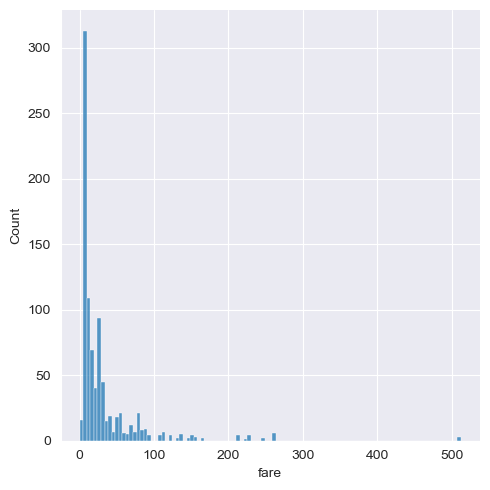

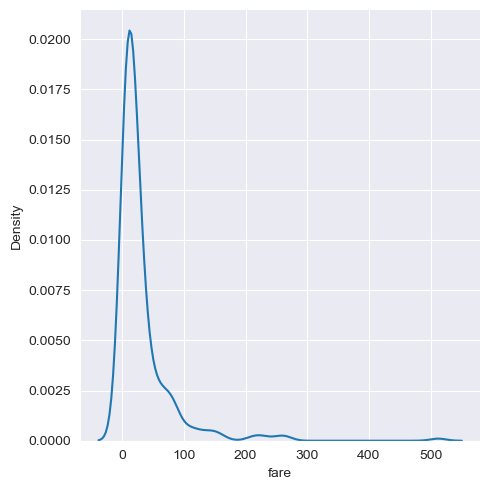

In [ ]:
# displot (figure 객체 생성)
sns.displot(titanic['fare'], kind='hist')
plt.show()

# displot (차트 종류 설정)
sns.displot(titanic['fare'], kind='kde')
plt.show()

#### 히트맵
- Seabon 라이브러리는 히트맵을 그리는 heatmap() 메소드를 제공.
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류.
- 데이터프레임을 피벗테이블로 정리할 때 한 변수('sex'열)를 행 인덱스로 나머지 변수('class'열)를 열 이름으로 설정함.
- aggfunc='size'옵션은 데이터 값의 크기를 기준으로 집계한다는 의미.
- cbar=False 또는 cbar=True 옵션으로 컬러 바를 표시 할 수 있음.

In [ ]:
# 히트맵
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

table

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2108\2311573118.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')


class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


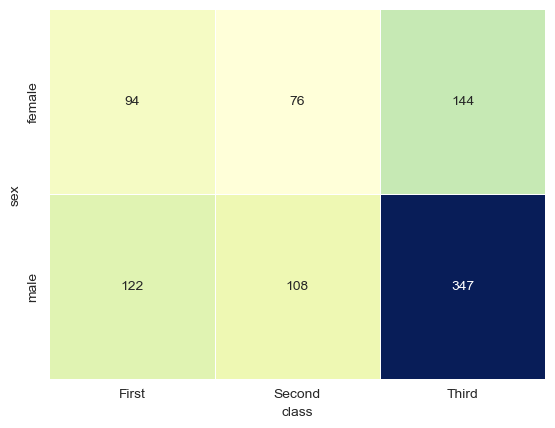

In [ ]:
# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # '.0f' = 'd' 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

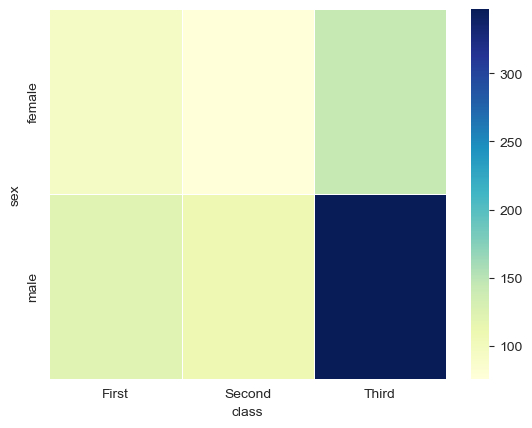

In [ ]:
# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=False,             # '.0f' = 'd' 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=True)              # 컬러 바 표시 여부

plt.show()

#### 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인하는 방법.
- stripplot() 함수와 swarmplot() 함수를 사용할 수 있음.(swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그림.)

C:\Users\dp_yang\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


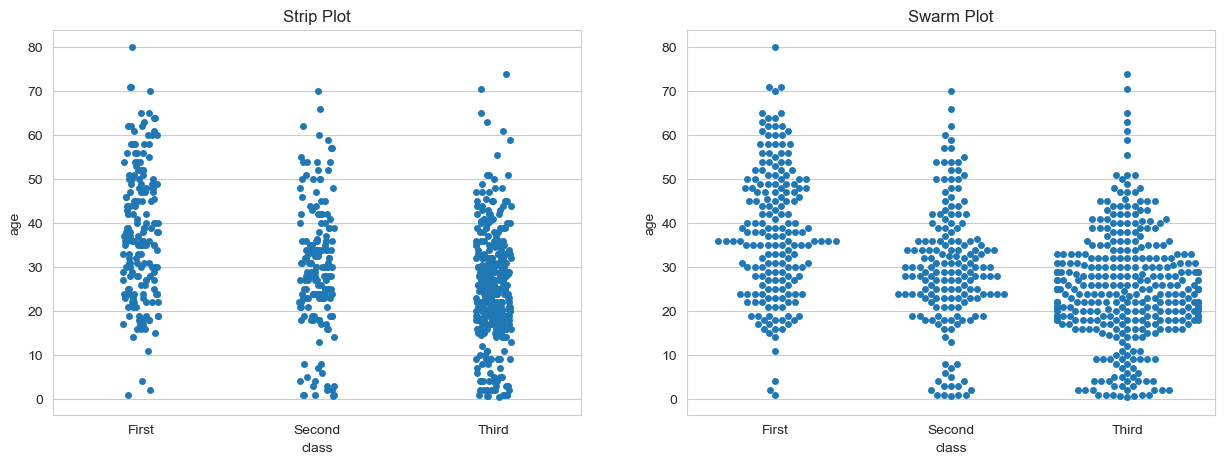

In [ ]:
# 범주형 데이터 산점도
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X)
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프
# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

C:\Users\dp_yang\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


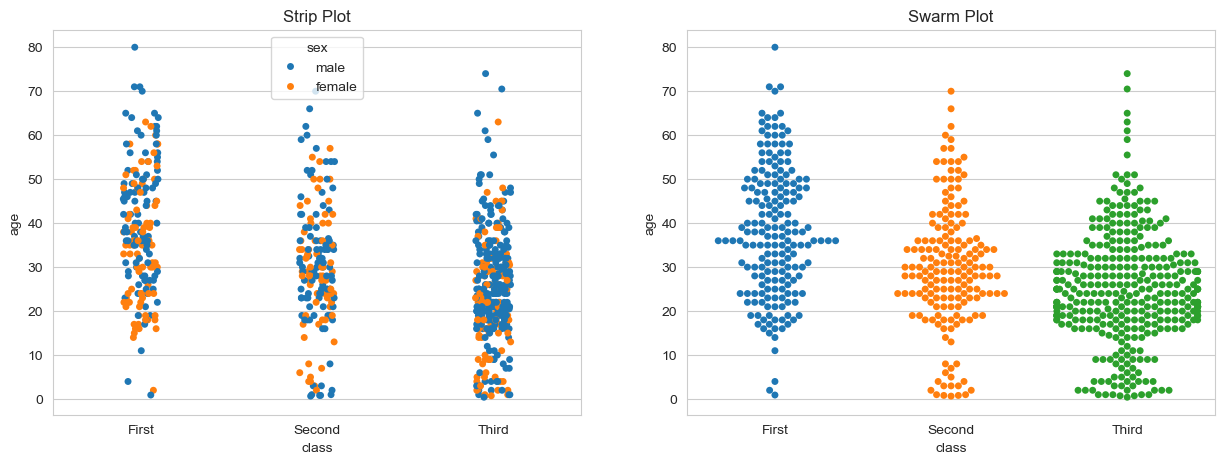

In [ ]:
# 범주형 데이터 산점도
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수
              hue = "sex",
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X)
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              hue = 'class',
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프
# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

#### 막대 그래프
- 막대 그래프를 그리는 barplot() 메소드는 바그래프를 그리는 그래프.   
- hue 옵션 추가하여 세부 집단을 묶어 시각화 가능.
- dodge=False 옵션을 활용하여 위로 쌓은 막대그래프 (stacked bar chart) 시각화 가능.
- 바그래프 상단의 검은색 선은 신뢰구간을 의미.

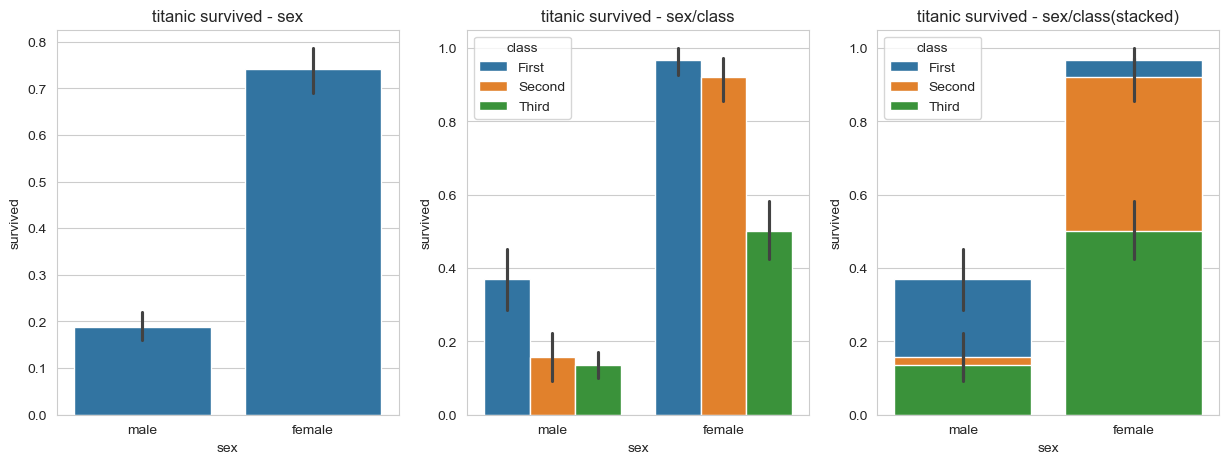

In [ ]:
# 막대그래프
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

- seaborn은 barplot() 함수를 사용할 때 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다.
    - 오차 막대: "이 평균값, 과연 믿을 만할까?"
     ```
     바 그래프에서 막대 높이가 뭘 나타내겠어? 보통 평균값을 보여주잖아. 예를 들어, 우리 과 애들 한 학기 평균 학점이 3.5라고 바 그래프를 그렸다고 쳐보자.

    근데 이 "3.5점"이라는 평균이 진짜 우리 과 전체 평균이라고 딱 잘라 말할 수 없음? 아니면 사실은 3.3일 수도 있고, 3.7일 수도 있다?

    오차 막대는 바로 이런 "평균값이 얼마나 왔다 갔다 할 수 있는지" 또는 **"이 평균이 얼마나 정확한지"**를 알려주는 꼬리표.
     ```

![image.png](attachment:image.png)

#### 빈도 그래프
- countplot()메소드는 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄.

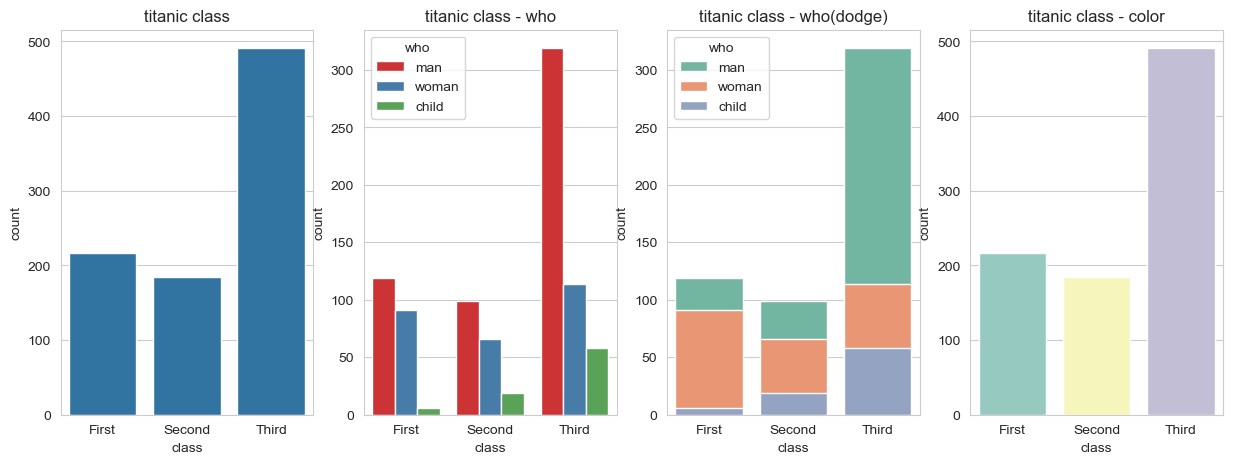

In [ ]:
# 빈도 그래프
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
# 기본값
sns.countplot(x='class', data=titanic, ax=axes[0])
# hue 옵션에 'who' 추가,  dodge=True 옵션 추가
sns.countplot(x='class', hue='who', palette='Set1', dodge=True, data=titanic, ax=axes[1])
# hue 옵션에 'who' 추가, dodge=False 옵션 추가
sns.countplot(x='class', hue='who', palette='Set2', dodge=False, data=titanic, ax=axes[2])
# hue 옵션에 x축 변수 추가
sns.countplot(x='class', hue='class', palette='Set3', data=titanic, ax=axes[3])

# 차트 제목 표시
axes[0].set_title('titanic class')
axes[1].set_title('titanic class - who')
axes[2].set_title('titanic class - who(dodge)')
axes[3].set_title('titanic class - color')

plt.show()

#### 박스/바이올린 그래프
- 박스 플롯은 범주형 데이터 분포와 주요 통계 지표를 함께 제공.
- 바이올린 그래프는 박스 플롯만으로 데이터가 퍼져 있는 분산의 정도를 알기 어렵기 때문에 커널 밀도 함수 그래프롤 y축 방향에 추가하여 바이올린 그래프를 그릴 수 있음.

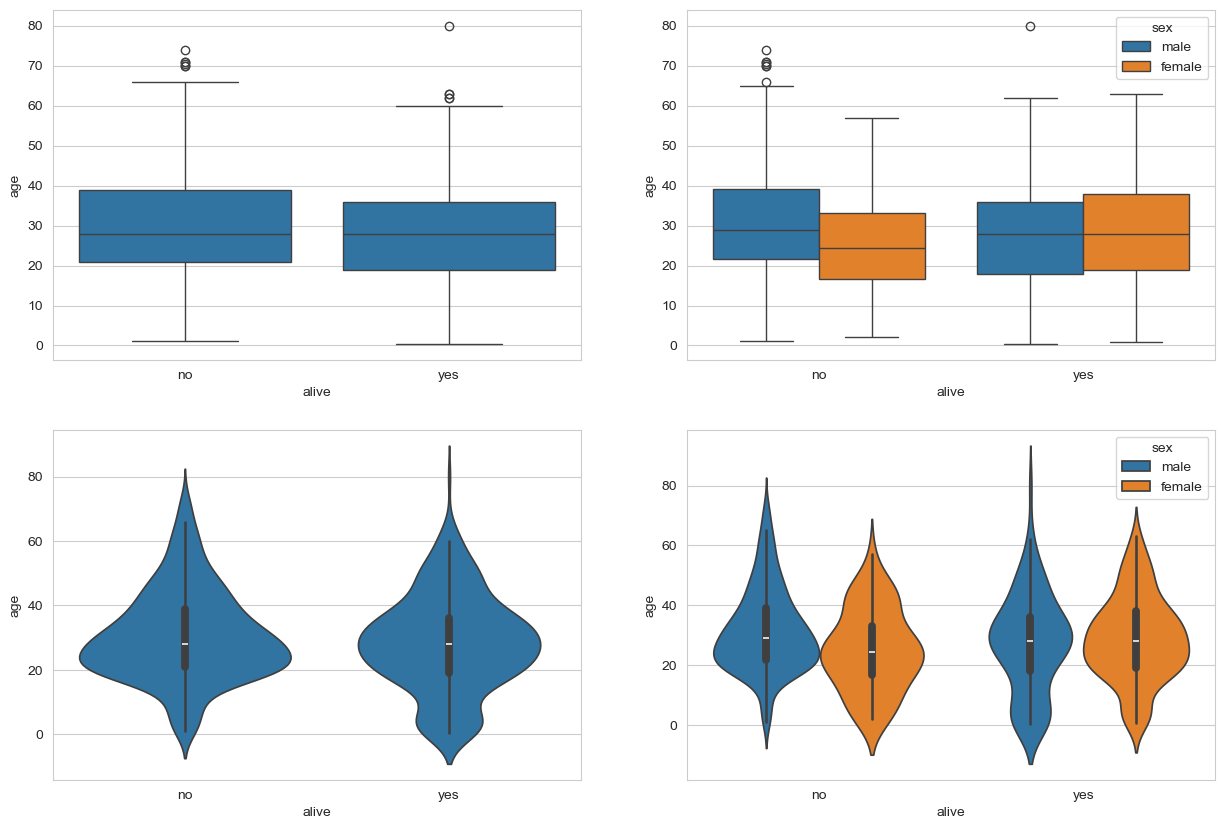

In [ ]:
# 박스/바이올린 그래프
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')
# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
# 박스 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
# 바이올린 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

#### 조인트 그래프
- jointplot() 메소드는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌.    
- 두 변수의 관계와 데이터가 분산되어 있는 정도를 한눈에 파악하기 좋음.   
    - 회귀선 추가(kind='reg')
    - 육각 산점도(kind='hex')
    - 거널 밀집 그래프(kind='kde')

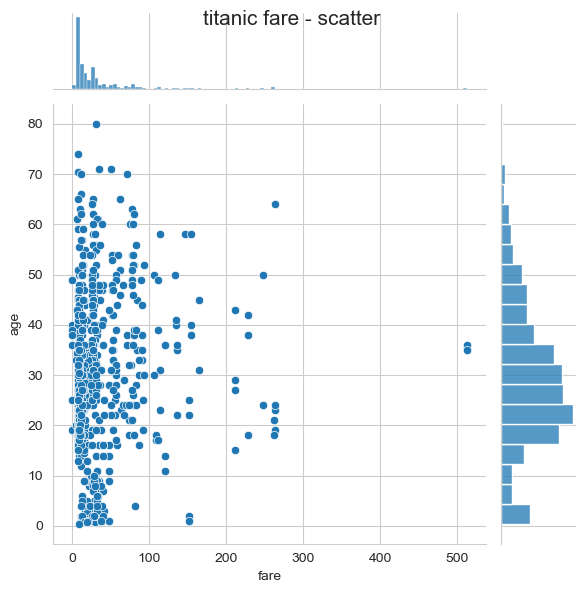

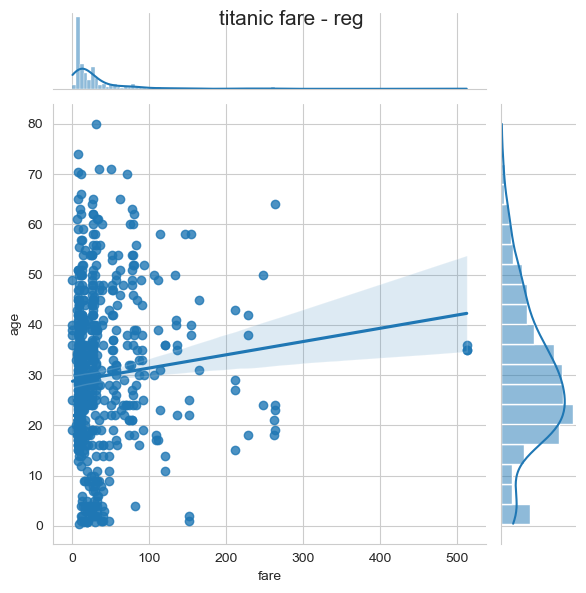

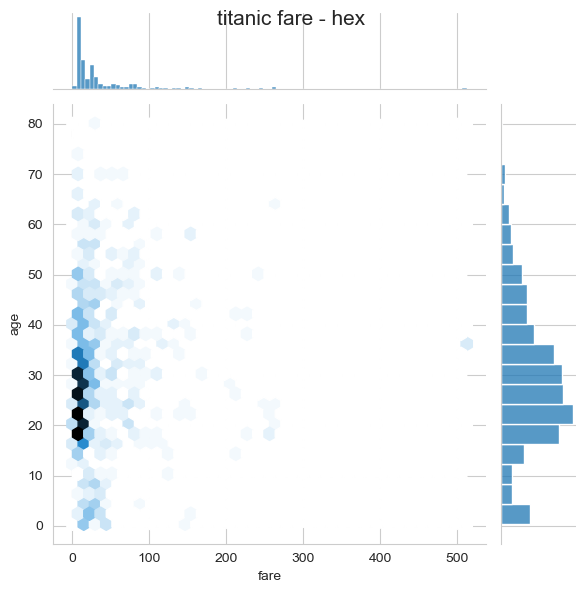

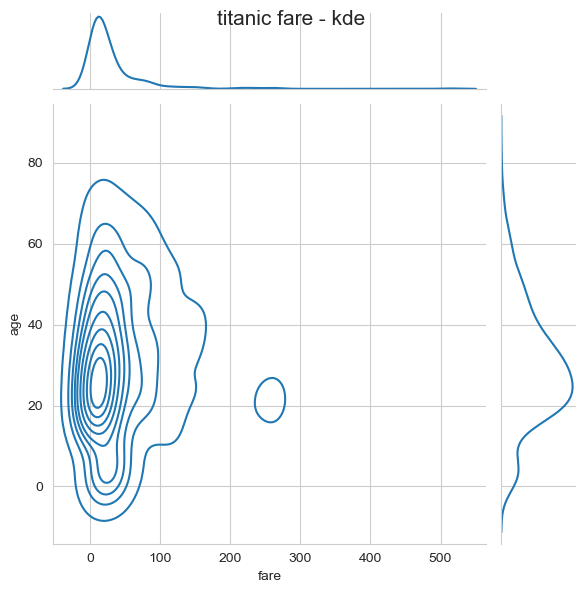

In [ ]:
# 조인트 그래프
# : 산점도를 기본으로 하고 x,y 축에 변수에 대한 히스토그램을 보여준다.
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)
# 차트 제목 표시
j1.figure.suptitle('titanic fare - scatter', size=15)
j2.figure.suptitle('titanic fare - reg', size=15)
j3.figure.suptitle('titanic fare - hex', size=15)
j4.figure.suptitle('titanic fare - kde', size=15)
plt.show()

#### 조건을 적용하여 화면을 그리드로 분할하기
- FacetGrid() 함수는 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯을 만듦.
- 서브 플롯에 적용할 그래프 종류를 map()메소드를 이용하여 그리드 객체에 전달.

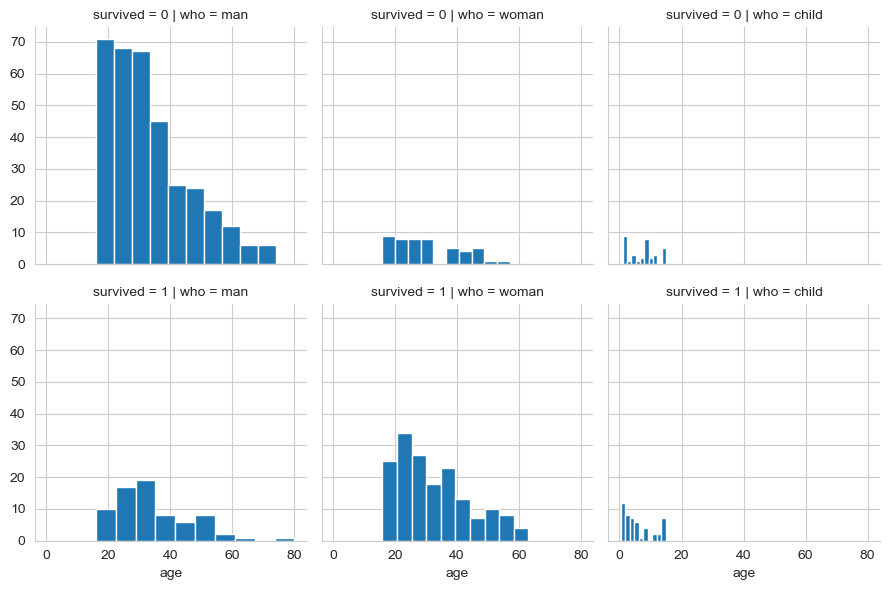

In [ ]:
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

#### 이변수 데이터의 분포
- pairplot() 메소드는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현.   
- 그래프를 그리기 위해 만들어진 짝의 개수만큼 화면을 그리드로 나눔.

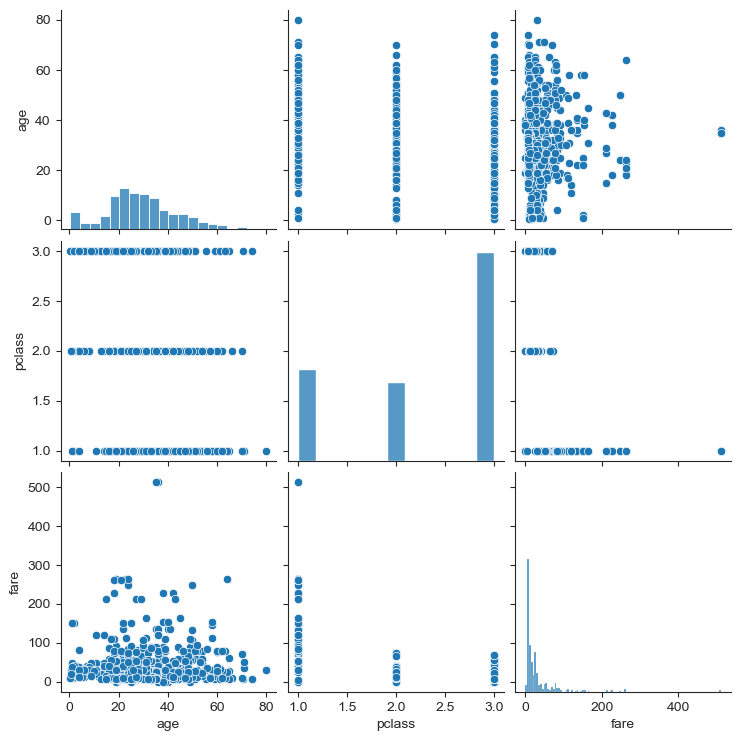

In [ ]:
# pairplot()함수는 인자로 전달받는 데이터프레임의 컬럼을 두 개씩
# 짝지을 수 잇는 모든 조합에 대해 표현한다.
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('ticks')
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

#### folium 라이브러리 - 지도 활용

설치 pip install folium

In [ ]:
# 라이브러리 불러오기
# https://python-visualization.github.io/folium/latest/user_guide/raster_layers/tiles.html
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

seoul_map

In [ ]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기 (Cartodb Positron 기본 타일 적용)
seoul_map2 = folium.Map(location=[37.55,126.98], tiles="Cartodb dark_matter",
                        zoom_start=12)

# 지도 객체 확인하기
seoul_map2

In [ ]:
# https://leaflet-extras.github.io/leaflet-providers/preview/
# OpenStreetMap으로 시작하는 지도는 무료

attr = ('Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)')

tiles = 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png'

seoul_map3 = folium.Map(location=[37.55,126.98], tiles=tiles, attr=attr,
                        zoom_start=12)

seoul_map3

In [ ]:
# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임 변환
# 파일 공유 : https://url.kr/tjohaf
df = pd.read_excel("C:/py_data/서울지역 대학교 위치.xlsx")
# df = pd.read_excel("./서울지역 대학교 위치.xlsx")            코랩인 경우
df.head()

,Unnamed: 0,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


In [ ]:
df.set_index(df.columns[0], inplace=True)
df.head()

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [ ]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Cartodb Positron',
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name in df.index:
    lat = df.loc[name]['위도']
    lng = df.loc[name]['경도']
    folium.Marker([lat, lng], popup=name, icon = folium.Icon(color='blue',icon='star')).add_to(seoul_map)
seoul_map.save('./서울 대학교 지도1.html')

In [ ]:
seoul_map

In [ ]:
# 서울 지도 만들기
seoul_map1 = folium.Map(location=[37.55,126.98],
                        tiles='Cartodb Positron', # 지도 옵션
                        zoom_start=12)
# 대학교 위치정보를 Marker로 표시
for name in df.index:
    lat = df.loc[name]['위도']
    lng = df.loc[name]['경도']
    folium.CircleMarker([lat, lng], radius=5,
                        color='brown',fill=True,
                        fill_color='coral',
                        fill_opacity=0.7,
                        popup=name).add_to(seoul_map1)
seoul_map1.save('./서울 대학교 지도2.html')

In [ ]:
seoul_map1

In [ ]:
# 경기도 인구데이터: https://url.kr/b7qwm9
# 경기도행정구역경계: https://url.kr/vtb9er

import pandas as pd
import json
# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
# index_col: 인덱스컬럼 지정
df = pd.read_excel('c:/py_data/경기도인구데이터.xlsx', index_col='구분')
# df = pd.read_excel('./경기도인구데이터.xlsx', index_col='구분')    # 코랩
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [ ]:
df.columns

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [ ]:
# for i in range(len(df.columns)):
#     df = df.rename(columns = {df.columns[i]:str(df.columns[i])})
df.columns = df.columns.map(str)

In [ ]:
df.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [ ]:
import json

geo_data = json.load(open('c:/py_data/경기도행정구역경계.json',encoding='utf-8'))
# geo_data = json.load(open('./경기도행정구역경계.json',encoding='utf-8'))   코랩

geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [ ]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],
                   tiles='Cartodb Positron', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)
g_map

In [ ]:
g_map.save('./sss.html')